In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Общее

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [2]:
airports = pd.read_csv('csv_airports_v1.csv')
routes = pd.read_csv('csv_routes_v1.csv')

## Задание 2. 
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

In [3]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  7697 non-null   object 
 5   ICAO                  7697 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7697 non-null   object 
 10  DST                   7697 non-null   object 
 11  Tz database timezone  7697 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB


In [4]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67662 non-null  object
 1   Airline ID              67662 non-null  object
 2   Source airport          67662 non-null  object
 3   Source airport ID       67662 non-null  object
 4   Destination airport     67662 non-null  object
 5   Destination airport ID  67662 non-null  object
 6   Equipment               67644 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


In [5]:
airports = airports.replace(to_replace='\\N', value=np.nan)
routes = routes.replace(to_replace='\\N', value=np.nan)

In [6]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  6071 non-null   object 
 5   ICAO                  7696 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7344 non-null   object 
 10  DST                   7344 non-null   object 
 11  Tz database timezone  6676 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB


In [7]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67662 non-null  object
 1   Airline ID              67183 non-null  object
 2   Source airport          67662 non-null  object
 3   Source airport ID       67442 non-null  object
 4   Destination airport     67662 non-null  object
 5   Destination airport ID  67441 non-null  object
 6   Equipment               67644 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


## Задание 3. 
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

In [8]:
iata_airports = airports[airports['IATA'].notna()].copy()
iata_airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6071 entries, 0 to 7695
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            6071 non-null   int64  
 1   Name of airport       6071 non-null   object 
 2   City                  6032 non-null   object 
 3   Country               6071 non-null   object 
 4   IATA                  6071 non-null   object 
 5   ICAO                  6071 non-null   object 
 6   Latitude              6071 non-null   float64
 7   Longitude             6071 non-null   float64
 8   Altitude              6071 non-null   int64  
 9   Timezone              5867 non-null   object 
 10  DST                   5867 non-null   object 
 11  Tz database timezone  5514 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 616.6+ KB


In [9]:
import pycountry_convert as pcc

In [11]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pcc.country_name_to_country_alpha2(country_name)
        country_continent_code = pcc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pcc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None

iata_airports['Continent'] = iata_airports['Country'].map(country_to_continent)
iata_airports.head()

,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Continent
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,Oceania
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,Oceania
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,Oceania
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,Oceania
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,Oceania


In [12]:
iata_airports[iata_airports['Continent'].isna()].Country.unique()

array(["Cote d'Ivoire", 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Saint Helena', 'Reunion', 'Midway Islands', 'Antarctica',
       'Virgin Islands', 'Netherlands Antilles', 'Burma', 'East Timor',
       'Johnston Atoll', 'Western Sahara', 'Wake Island'], dtype=object)

In [13]:
# Австралия и Океания — часть света, состоящая из материка Австралия, островов, прилегающих к Австралии, и сотен небольших островов и атоллов в центральной и западной частях Тихого океана.
country_dict ={"Cote d'Ivoire":'Africa',
             'Congo (Brazzaville)':'Africa',
             'Saint Helena':'Africa',
             'Reunion':'Africa',
             'Midway Islands':'Oceania',
             'Antarctica': 'Antarctica',
             'Virgin Islands':'North America',
             'Netherlands Antilles':'South America',
             'Burma':'Asia',
             'East Timor':'Oceania',
             'Johnston Atoll':'Oceania',
             'Western Sahara':'Africa',
             'Wake Island':'Oceania',
              'Congo (Kinshasa)':'Africa'}

def country_to_continent2(country_name):
    try:
        country_alpha2 = pcc.country_name_to_country_alpha2(country_name)
        country_continent_code = pcc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pcc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except KeyError:
        if country_name in country_dict:
            country_continent_name = country_dict[country_name]
            return country_continent_name
        else:
            return None
    except:   
        return None

iata_airports['Continent'] = iata_airports['Country'].map(country_to_continent2)   
iata_airports[iata_airports['Continent'].isna()].Country.unique()


array([], dtype=object)

In [14]:
iata_airports['Continent'].unique()

array(['Oceania', 'North America', 'Europe', 'Africa', 'South America',
       'Asia', 'Antarctica'], dtype=object)

## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_arports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

In [15]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [18]:
def random_con():
    return np.random.choice(iata_airports['Continent'].unique()) #выбор случайного континента

index= random_con()
mask = iata_airports['Continent'] == index
index

'Oceania'

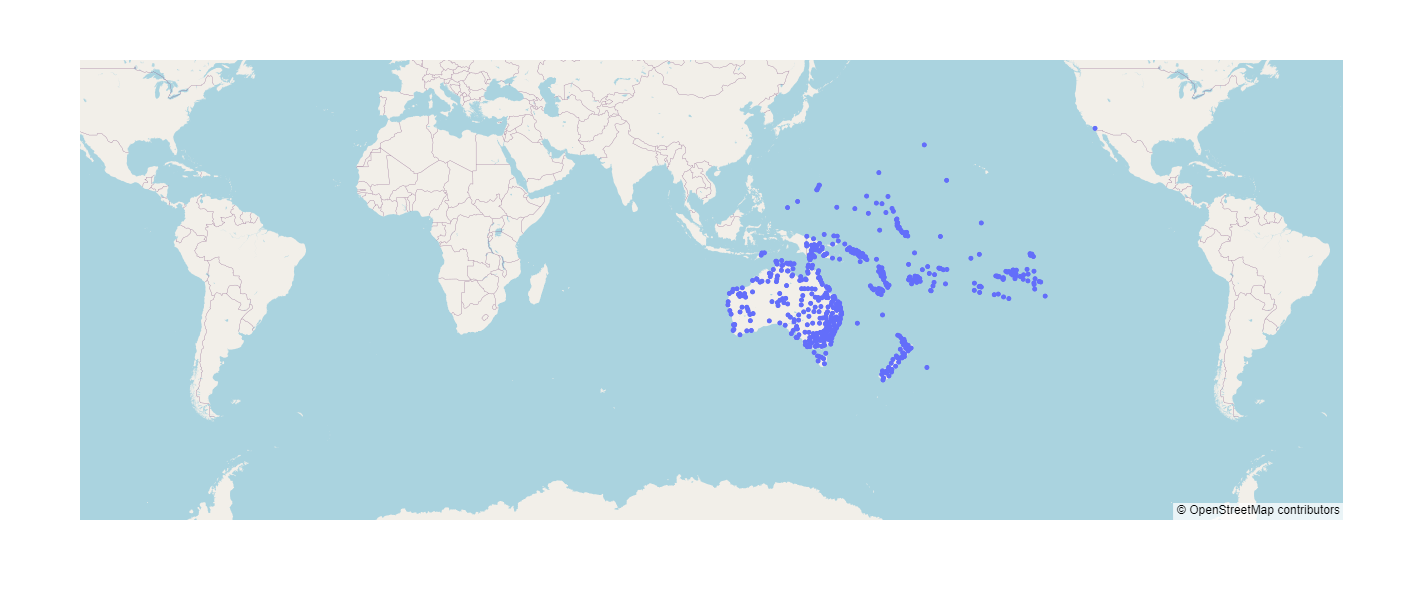

In [19]:
fig = px.scatter_mapbox(lat=iata_airports[mask]['Latitude'], lon=iata_airports[mask]['Longitude'],height=600, width=800,zoom=1)
fig.update_layout(mapbox_style='open-street-map')
fig.show()


In [20]:
masks = dict()
for i in iata_airports['Continent'].unique():
    masks[i] =  iata_airports['Continent'] == i
masks.keys()

dict_keys(['Oceania', 'North America', 'Europe', 'Africa', 'South America', 'Asia', 'Antarctica'])

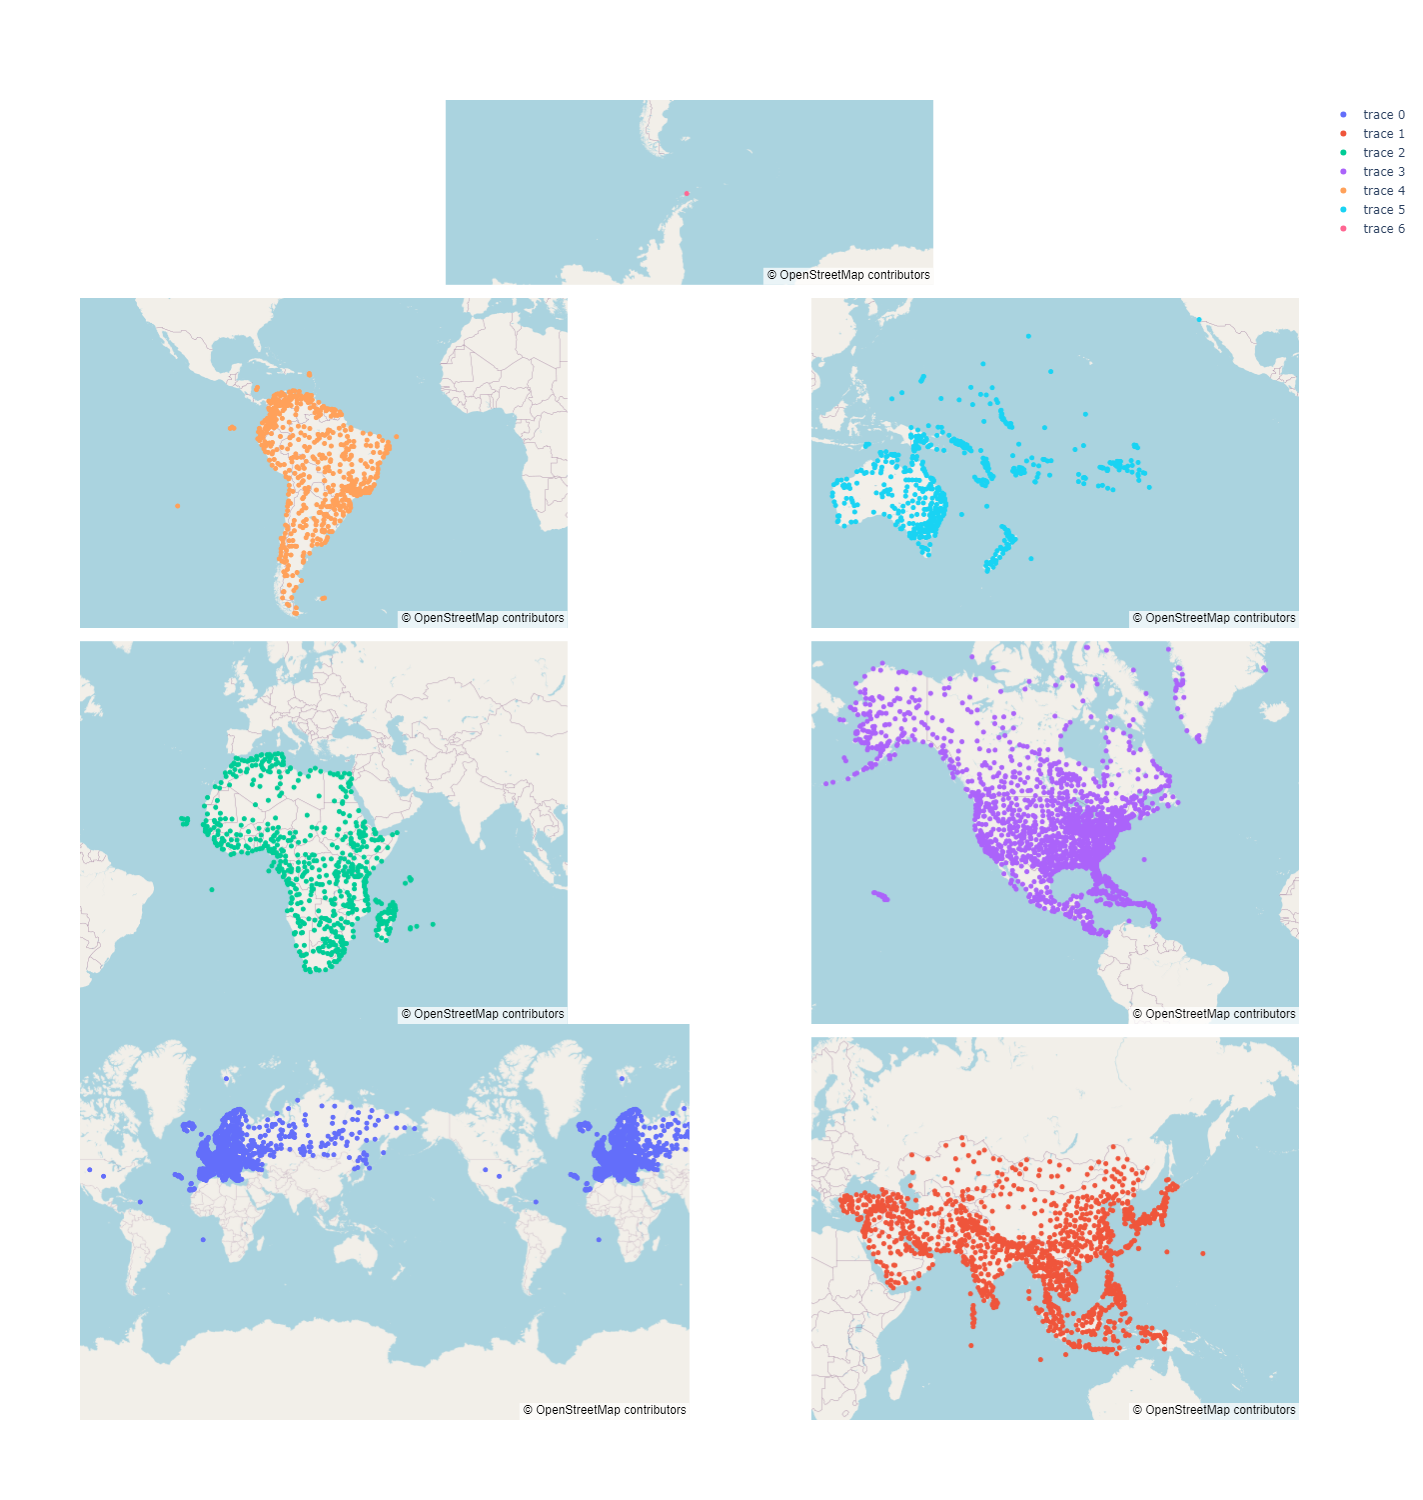

In [21]:
maps = go.Figure()

maps.add_trace(go.Scattermapbox(lat=iata_airports[masks['Europe']]['Latitude'], lon=iata_airports[masks['Europe']]['Longitude'], subplot='mapbox'))
maps.add_trace(go.Scattermapbox(lat=iata_airports[masks['Asia']]['Latitude'], lon=iata_airports[masks['Asia']]['Longitude'], subplot='mapbox2'))
maps.add_trace(go.Scattermapbox(lat=iata_airports[masks['Africa']]['Latitude'], lon=iata_airports[masks['Africa']]['Longitude'], subplot='mapbox3'))
maps.add_trace(go.Scattermapbox(lat=iata_airports[masks['North America']]['Latitude'], lon=iata_airports[masks['North America']]['Longitude'], subplot='mapbox4'))
maps.add_trace(go.Scattermapbox(lat=iata_airports[masks['South America']]['Latitude'], lon=iata_airports[masks['South America']]['Longitude'], subplot='mapbox5'))
maps.add_trace(go.Scattermapbox(lat=iata_airports[masks['Oceania']]['Latitude'], lon=iata_airports[masks['Oceania']]['Longitude'], subplot='mapbox6'))
maps.add_trace(go.Scattermapbox(lat=iata_airports[masks['Antarctica']]['Latitude'], lon=iata_airports[masks['Antarctica']]['Longitude'], subplot='mapbox7'))

maps.update_layout(autosize=True,
    hovermode='closest',height=1500,
    mapbox=dict(domain={'x': [0.0, 0.5], 'y': [0, 0.3]},
        style='open-street-map',
        pitch=0,
        zoom=1,
        center=dict(
            lat=56,
            lon=47
        ),
    ),
    mapbox2=dict(domain={'x': [0.6, 1.0], 'y': [0, 0.29]},
        style='open-street-map',
        pitch=0,
        zoom=1,
        center=dict(
            lat=32,
            lon=102
        ),
    ),        
    mapbox3=dict(domain={'x': [0, 0.4], 'y': [0.3, 0.59]},
        style='open-street-map',
        pitch=0,
        zoom=1,
        center=dict(
            lat=12,
            lon=25
        ),
    ),        
    mapbox4=dict(domain={'x': [0.6, 1.0], 'y': [0.3, 0.59]},
        style='open-street-map',
        pitch=0,
        zoom=1,
        center=dict(
            lat=40,
            lon=-96
        ),
    ),        
    mapbox5=dict(domain={'x': [0, 0.4], 'y': [0.6, 0.85]},
        style='open-street-map',
        center=dict(
            lat=-13,
            lon=-58
        ),
        pitch=0,
        zoom=1
    ),        
    mapbox6=dict(domain={'x': [0.6, 1.0], 'y': [0.6, 0.85]},
        style='open-street-map',
        pitch=0,
        center=dict(
            lat=-15,
            lon=-168
        ),
        zoom=1
    ),        
    mapbox7=dict(domain={'x': [0.3, 0.7], 'y': [0.86, 1]},
        style='open-street-map',
        center=dict(
            lat=-62,
            lon=-58
        ),
        pitch=0,
        zoom=1
    )
)
maps.show()

In [ ]:
#Существуют аэропорты, принадлежащие некоторому материку,но не находящимся на нем

## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

In [118]:
sources = routes.groupby('Source airport')['Airline'].count().reset_index()
sources.columns=['IATA', 'Sum_of_take-offs']

def f(x): 
    try:
        if len(x) == 3:
            return iata_airports[(iata_airports['IATA'].isin([x]))]['Country'].values[0]       
    except:
       return None
        
sources['Country'] = sources['IATA'].apply(f)
sources_sum = sources.groupby('Country')['Sum_of_take-offs'].sum().reset_index()
sources_sum

,Country,Sum_of_take-offs
0,Afghanistan,43
1,Albania,36
2,Algeria,221
3,American Samoa,1
4,Angola,78
...,...,...
220,Wallis and Futuna,4
221,Western Sahara,7
222,Yemen,93
223,Zambia,55


In [23]:
destination = routes.groupby('Destination airport')['Airline'].count().reset_index()
destination.columns=['IATA', 'Sum_of_bordings']

destination['Country'] = destination['IATA'].apply(f)
destination_sum = destination.groupby('Country')['Sum_of_bordings'].sum().reset_index()
destination_sum.head()

,Country,Sum_of_bordings
0,Afghanistan,41
1,Albania,36
2,Algeria,221
3,American Samoa,1
4,Angola,77


In [24]:
flights_for_country = destination_sum.merge(sources_sum, on='Country',  how='outer').fillna(0) 
flights_for_country

,Country,Sum_of_bordings,Sum_of_take-offs
0,Afghanistan,41.0,43
1,Albania,36.0,36
2,Algeria,221.0,221
3,American Samoa,1.0,1
4,Angola,77.0,78
...,...,...,...
220,Western Sahara,7.0,7
221,Yemen,90.0,93
222,Zambia,54.0,55
223,Zimbabwe,42.0,37


In [25]:
no_flight_country = iata_airports[(~ iata_airports['IATA'].isin(routes['Source airport'].unique())) &
              (~ iata_airports['IATA'].isin(routes['Destination airport'].unique())) &
              (~ iata_airports['ICAO'].isin(routes['Destination airport'].unique())) &
              (~ iata_airports['ICAO'].isin(routes['Source airport'].unique())) & 
              (~ iata_airports['Country'].isin(flights_for_country['Country'].unique()))]['Country'].unique()
no_flight_country

array(['Saint Helena', 'British Indian Ocean Territory', 'Syria',
       'Midway Islands', 'Antarctica', 'Palestine', 'Montserrat',
       'Johnston Atoll', 'Myanmar', 'Wake Island'], dtype=object)

In [26]:
df_temp = pd.DataFrame({'Country': no_flight_country,
                        'Sum_of_bordings': [0] * len(no_flight_country),
                        'Sum_of_take-offs': [0] * len(no_flight_country),
                        })
df_temp

,Country,Sum_of_bordings,Sum_of_take-offs
0,Saint Helena,0,0
1,British Indian Ocean Territory,0,0
2,Syria,0,0
3,Midway Islands,0,0
4,Antarctica,0,0
5,Palestine,0,0
6,Montserrat,0,0
7,Johnston Atoll,0,0
8,Myanmar,0,0
9,Wake Island,0,0


In [27]:
flights_for_country = pd.concat([flights_for_country, df_temp], ignore_index = True) 
flights_for_country

,Country,Sum_of_bordings,Sum_of_take-offs
0,Afghanistan,41.0,43
1,Albania,36.0,36
2,Algeria,221.0,221
3,American Samoa,1.0,1
4,Angola,77.0,78
...,...,...,...
230,Palestine,0.0,0
231,Montserrat,0.0,0
232,Johnston Atoll,0.0,0
233,Myanmar,0.0,0


In [28]:
flights_for_country['All flights'] = flights_for_country['Sum_of_bordings'] + flights_for_country['Sum_of_take-offs']
flights_for_country.head()

,Country,Sum_of_bordings,Sum_of_take-offs,All flights
0,Afghanistan,41.0,43,84.0
1,Albania,36.0,36,72.0
2,Algeria,221.0,221,442.0
3,American Samoa,1.0,1,2.0
4,Angola,77.0,78,155.0


In [79]:
# Таблица для определенной страны
index= random_con() # выбираем случайным способом страну
mask = iata_airports['Continent'] == index
c_list= iata_airports[mask]['Country'].unique()
temp = flights_for_country

flights_one_continent = temp[temp['Country'].isin(c_list)].set_index('Country').sort_index()
flights_one_continent.head()

,Sum_of_bordings,Sum_of_take-offs,All flights
Country,,,
Afghanistan,41.0,43,84.0
Armenia,46.0,46,92.0
Azerbaijan,73.0,72,145.0
Bahrain,86.0,84,170.0
Bangladesh,105.0,104,209.0
Bhutan,5.0,5,10.0
British Indian Ocean Territory,0.0,0,0.0
Brunei,23.0,23,46.0
Burma,104.0,104,208.0


In [80]:
flights_one_country = flights_one_continent[flights_one_continent['All flights'] != 0]
no_flights_one_country = flights_one_continent[flights_one_continent['All flights'] == 0]
no_flights_one_country

,Sum_of_bordings,Sum_of_take-offs,All flights
Country,,,
British Indian Ocean Territory,0.0,0,0.0
Myanmar,0.0,0,0.0
Palestine,0.0,0,0.0
Syria,0.0,0,0.0


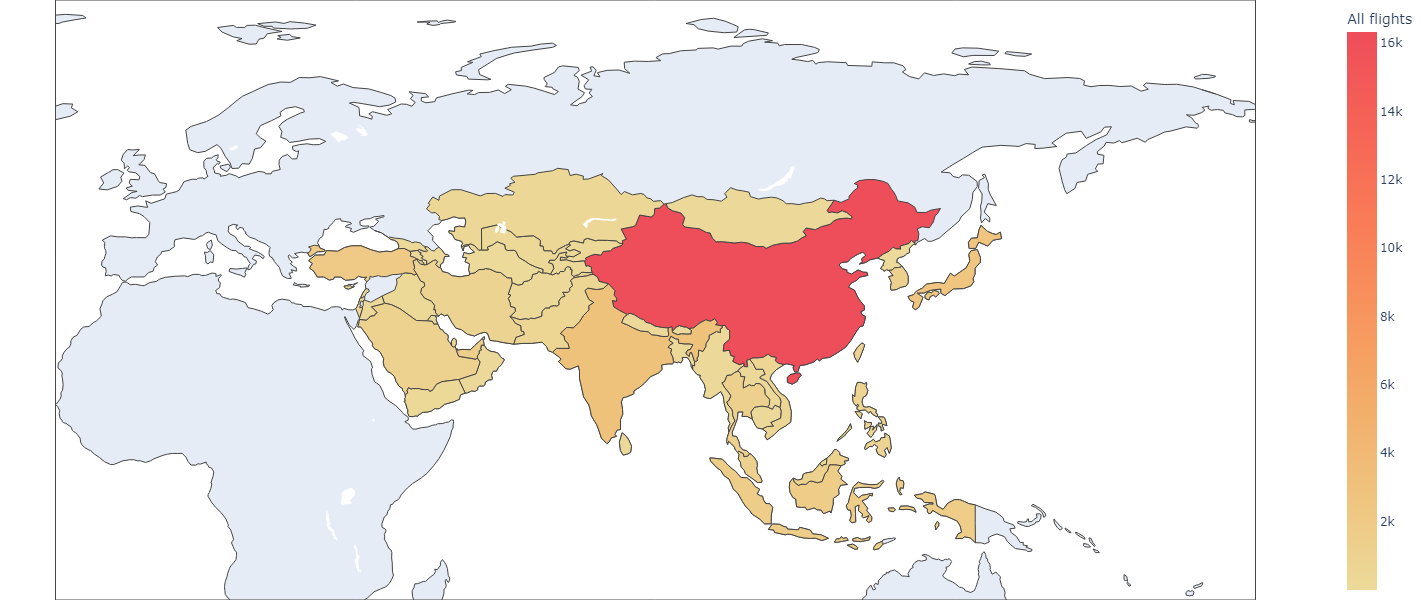

In [93]:
fig = px.choropleth(flights_one_country.reset_index(), locations='Country', color='All flights', locationmode='country names',color_continuous_scale='oryel')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, height=600)
fig.show()


## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

In [122]:
iata = sources.merge(destination, on='IATA', how='outer').fillna(0)[['IATA','Sum_of_take-offs','Sum_of_bordings']]
iata['All flights'] = iata['Sum_of_take-offs'] + iata['Sum_of_bordings']
iata

,IATA,Sum_of_take-offs,Sum_of_bordings,All flights
0,AAE,9.0,9.0,18.0
1,AAL,20.0,21.0,41.0
2,AAN,2.0,2.0,4.0
3,AAQ,3.0,3.0,6.0
4,AAR,8.0,8.0,16.0
...,...,...,...,...
3420,ORX,0.0,3.0,3.0
3421,QFX,0.0,1.0,1.0
3422,SPI,0.0,5.0,5.0
3423,TUA,0.0,1.0,1.0


In [141]:
df = iata_airports.merge(iata, on='IATA')
df = df.set_index(['Continent', 'Name of airport'])[['Country', 'City','IATA','All flights']].sort_index(level='Continent')
df

Country  \
Continent     Name of airport                                              
Africa        Aba Tenna Dejazmach Yilma International Airport   Ethiopia   
              Abeid Amani Karume International Airport          Tanzania   
              Abu Simbel Airport                                   Egypt   
              Addis Ababa Bole International Airport            Ethiopia   
              Aden Adde International Airport                    Somalia   
...                                                                  ...   
South America Yacuiba Airport                                    Bolivia   
              Yariguíes Airport                                 Colombia   
              Zona da Mata Regional Airport                       Brazil   
              Zumbi dos Palmares Airport                          Brazil   
              Ástor Piazzola International Airport             Argentina   

                                                                          City  \
Continent     Name of airport                                                    
Africa        Aba Tenna Dejazmach Yilma International Airport        Dire Dawa   
              Abeid Amani Karume International Airport                Zanzibar   
              Abu Simbel Airport                                    Abu Simbel   
              Addis Ababa Bole International Airport               Addis Ababa   
              Aden Adde International Airport                        Mogadishu   
...                                                                        ...   
South America Yacuiba Airport                                          Yacuiba   
              Yariguíes Airport                                Barrancabermeja   
              Zona da Mata Regional Airport                       Juiz de Fora   
              Zumbi dos Palmares Airport                                Maceio   
              Ástor Piazzola International Airport               Mar Del Plata   

                                                              IATA  \
Continent     Name of airport                                        
Africa        Aba Tenna Dejazmach Yilma International Airport  DIR   
              Abeid Amani Karume International Airport         ZNZ   
              Abu Simbel Airport                               ABS   
              Addis Ababa Bole International Airport           ADD   
              Aden Adde International Airport                  MGQ   
...                                                            ...   
South America Yacuiba Airport                                  BYC   
              Yariguíes Airport                                EJA   
              Zona da Mata Regional Airport                    IZA   
              Zumbi dos Palmares Airport                       MCZ   
              Ástor Piazzola International Airport             MDQ   

                                                               All flights  
Continent     Name of airport                                               
Africa        Aba Tenna Dejazmach Yilma International Airport          6.0  
              Abeid Amani Karume International Airport                24.0  
              Abu Simbel Airport                                       2.0  
              Addis Ababa Bole International Airport                 214.0  
              Aden Adde International Airport                         24.0  
...                                                                    ...  
South America Yacuiba Airport                                          8.0  
              Yariguíes Airport                                        2.0  
              Zona da Mata Regional Airport                            4.0  
              Zumbi dos Palmares Airport                              26.0  
              Ástor Piazzola International Airport                     6.0  

[3261 rows x 4 columns]

## Задание 7.
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по перевому).

Найдите 10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочить от наибольшего количества рейсов вниз. 